In [1]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# 1. Implementación
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.

In [16]:
n = 6
obs = 6
obs_b = [1,1,1,1,1,1]
n_trace = 10000

with pm.Model() as modelo1:
    theta1 = pm.Beta('theta', alpha=1, beta=1)
    
    coin_obs1 = pm.Binomial('observadas', n=n, p=theta1, observed=obs)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=modelo1, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)
    
with pm.Model() as modelo150:
    theta150 = pm.Beta('theta', alpha=150, beta=150)
    
    coin_throw150 = pm.Bernoulli('tirada', p=theta150, observed=obs_b)
    coin_obs150 = pm.Binomial('observadas', n=n, p=theta150, observed=obs)

    start150 = pm.find_MAP(model=modelo150, progressbar=False)
    step150 = pm.Metropolis()
    trace150 = pm.sample(n_trace, step150, start150, progressbar=False)

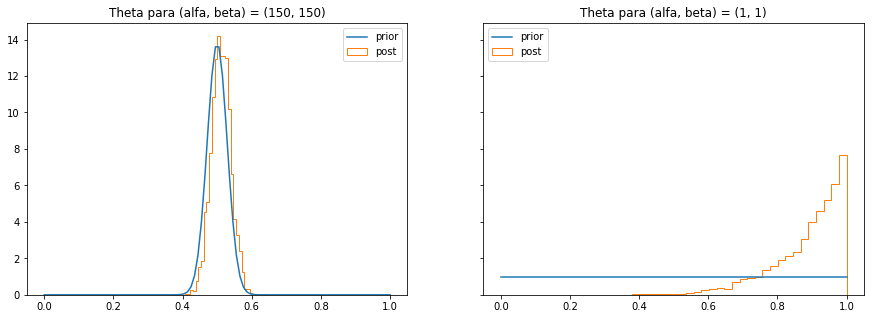

In [17]:
plt.clf()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
x = np.linspace(0, 1, 100)

axes[0].plot(x, stats.beta.pdf(x, 150, 150), label='prior')
axes[0].hist(trace150['theta'], 30, histtype='step', normed=True, label='post')
axes[0].legend(loc='best')
axes[0].set_title('Theta para (alfa, beta) = (150, 150)')

axes[1].plot(x, stats.beta.pdf(x, 1, 1), label='prior')
axes[1].hist(trace1['theta'], 30, histtype='step', normed=True, label='post')
axes[1].legend(loc='upper left')
axes[1].set_title('Theta para (alfa, beta) = (1, 1)')
fig.show()

map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)

Se observa fácilmente como el modelo que tiene una creencia más fuerte de que la moneda no está cargada (que se codifica en los parámetros de Beta) tiene una posterior mucho más parecida al prior que la del modelo con prior Beta(1, 1). 

Para este último se ve claramente como se pasa de la creencia de "no saber nada" acerca de la moneda, es decir que el valor de la probabilidad de que salga cara se distribuye uniformemente en el valor de los rangos, a una distribución con probabilidad alta en los valores que indican que la moneda está cargada.

# 2. Resúmenes
Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

Máximo a posteriori para prior Beta(1, 1): 0.999999231042
Posterior para prior Beta(1, 1)


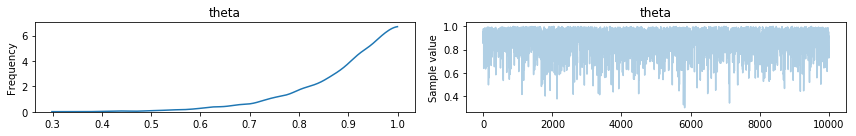



Máximo a posteriori para prior Beta(150, 150): 0.516618381428
Posterior para prior Beta(150, 150)


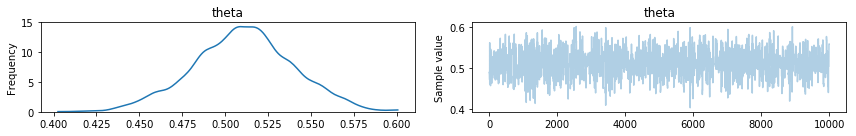

In [6]:
plt.clf()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])
print "Posterior para prior Beta(1, 1)"
pm.traceplot(trace1)
plt.show()

print "\n\nMáximo a posteriori para prior Beta(150, 150): {}".format(map_150_150['theta'])
print "Posterior para prior Beta(150, 150)"
pm.traceplot(trace150)
plt.show()

### Estimando la media de las posteriors

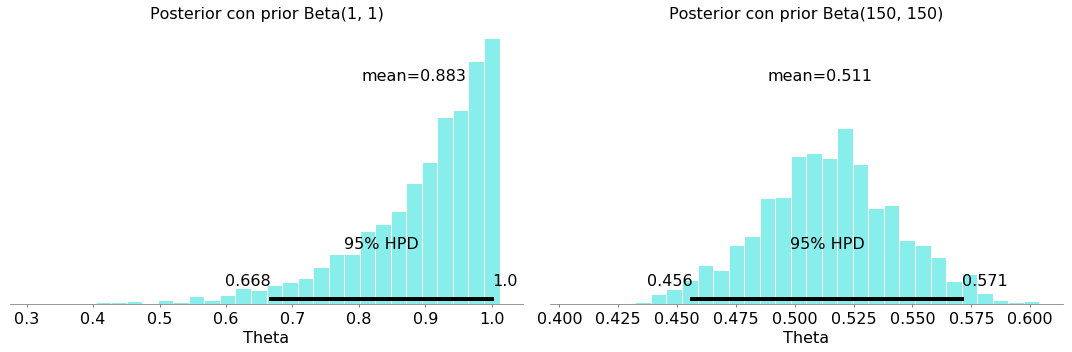

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

pm.plot_posterior(trace1, color='#87eeeb', point_estimate='mean', ax=axes[0])
axes[0].set_title("Posterior con prior Beta(1, 1)", fontsize=16)
axes[0].set_xlabel("Theta", fontsize=16)

pm.plot_posterior(trace150, color='#87eeeb', point_estimate='mean', ax=axes[1])
axes[1].set_title("Posterior con prior Beta(150, 150)", fontsize=16)
axes[1].set_xlabel("Theta", fontsize=16)

fig.show()

Tanto el gráfico del máximo a posteriori como el de la media de las posteriors confirman lo que observamos en el primer punto. El modelo con la hipótesis más fuerte (prior Beta(150, 150)) se ve poco afectado por las nuevas mediciones observadas, ya que no tienen tanto peso como para modificar apreciablemente la creencia anterior. Por otro lado el modelo sin información previa se ve muy afectado luego de las observaciones, alterando su media de 0.5 a 0.883.

# 3. Predicción
Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

In [8]:
ppc1 = pm.sample_ppc(trace1, samples=1, model=modelo1, size=10, progressbar=False)
ppc150 = pm.sample_ppc(trace150, samples=1, model=modelo150, size=10, progressbar=False)
print "Prediccion de 10 tiradas para (1,1): {}".format(ppc1['tirada'][0])
print "Prediccion de 10 tiradas para (150,150): {}".format(ppc150['tirada'][0])


Prediccion de 10 tiradas para (1,1): [1 1 1 1 0 0 1 1 1 1]
Prediccion de 10 tiradas para (150,150): [0 1 0 0 1 0 1 0 0 0]


# 4. Otros datos
Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en
la que se observan 3 caras de 3 tiradas. ¿Qué puede concluir de los priors elegidos? ¿Y del modelo en
general?

## Modelo si observo 20 caras de 20 tiradas

In [9]:
obs_b = [1]*20

with pm.Model() as modelo1:
    theta1 = pm.Beta('theta', alpha=1, beta=1)
    
    coin_obs1 = pm.Binomial('observadas', n=20, p=theta1, observed=20)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=modelo1, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)
    
with pm.Model() as modelo150:
    theta150 = pm.Beta('theta', alpha=150, beta=150)
    
    coin_throw150 = pm.Bernoulli('tirada', p=theta150, observed=obs_b)
    coin_obs150 = pm.Binomial('observadas', n=20, p=theta150, observed=20)

    start150 = pm.find_MAP(model=modelo150, progressbar=False)
    step150 = pm.Metropolis()
    trace150 = pm.sample(n_trace, step150, start150, progressbar=False)

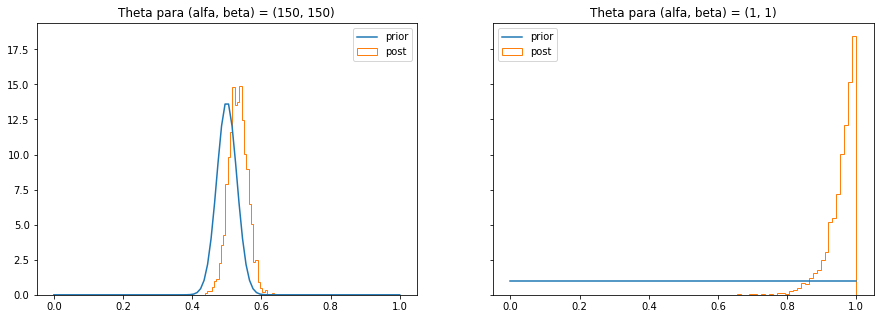

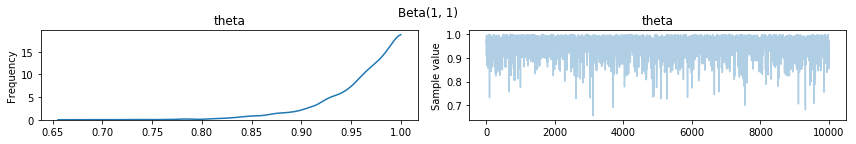

Máximo a posteriori para prior Beta(1, 1): 0.999999807761


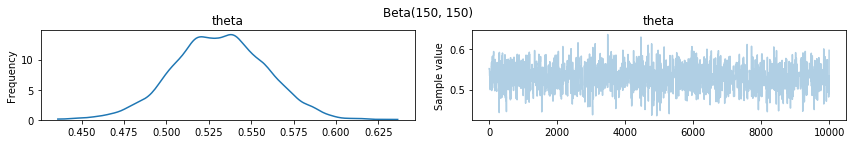

Máximo a posteriori para prior Beta(150, 150): 0.540863482479


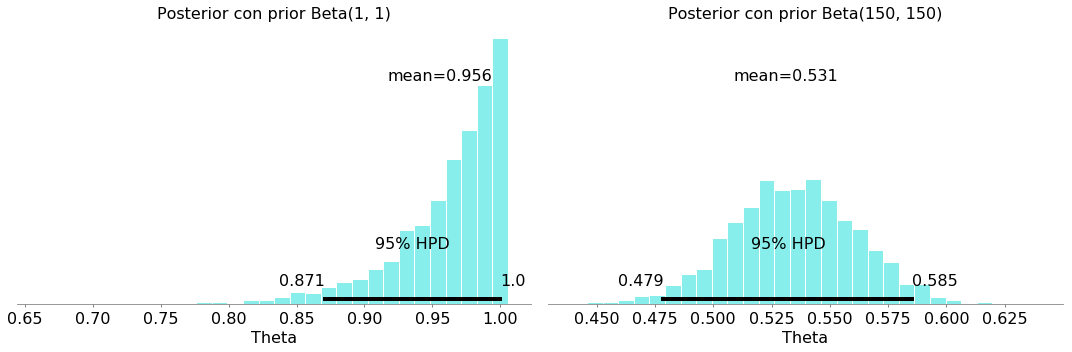

In [10]:
plt.clf()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
x = np.linspace(0, 1, 100)

axes[0].plot(x, stats.beta.pdf(x, 150, 150), label='prior')
axes[0].hist(trace150['theta'], 30, histtype='step', normed=True, label='post')
axes[0].legend(loc='best')
axes[0].set_title('Theta para (alfa, beta) = (150, 150)')

axes[1].plot(x, stats.beta.pdf(x, 1, 1), label='prior')
axes[1].hist(trace1['theta'], 30, histtype='step', normed=True, label='post')
axes[1].legend(loc='upper left')
axes[1].set_title('Theta para (alfa, beta) = (1, 1)')
fig.show()

map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)

pm.traceplot(trace1)
plt.suptitle("Beta(1, 1)")
plt.show()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])


pm.traceplot(trace150)
plt.suptitle("Beta(150, 150)")
plt.show()

print "Máximo a posteriori para prior Beta(150, 150): {}".format(map_150_150['theta'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

pm.plot_posterior(trace1, color='#87eeeb', point_estimate='mean', ax=axes[0])
axes[0].set_title("Posterior con prior Beta(1, 1)", fontsize=16)
axes[0].set_xlabel("Theta", fontsize=16)

pm.plot_posterior(trace150, color='#87eeeb', point_estimate='mean', ax=axes[1])
axes[1].set_title("Posterior con prior Beta(150, 150)", fontsize=16)
axes[1].set_xlabel("Theta", fontsize=16)

fig.show()

### Predicciones del modelo

In [11]:
ppc1 = pm.sample_ppc(trace1, samples=1, model=modelo1, size=10, progressbar=False)
ppc150 = pm.sample_ppc(trace150, samples=1, model=modelo150, size=10, progressbar=False)
print "Prediccion de 10 tiradas para (1,1): {}".format(ppc1['tirada'][0])
print "Prediccion de 10 tiradas para (150,150): {}".format(ppc150['tirada'][0])


Prediccion de 10 tiradas para (1,1): [1 1 1 1 1 1 0 1 1 1]
Prediccion de 10 tiradas para (150,150): [0 1 0 0 0 1 1 1 1 1]


## Modelo si observo 3 caras de 3 tiradas

In [12]:
obs_b = [1]*3
with pm.Model() as modelo1:
    theta1 = pm.Beta('theta', alpha=1, beta=1)
    
    coin_obs1 = pm.Binomial('observadas', n=3, p=theta1, observed=3)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=modelo1, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)
    
with pm.Model() as modelo150:
    theta150 = pm.Beta('theta', alpha=150, beta=150)
    
    coin_throw150 = pm.Bernoulli('tirada', p=theta150, observed=obs_b)
    coin_obs150 = pm.Binomial('observadas', n=3, p=theta150, observed=3)

    start150 = pm.find_MAP(model=modelo150, progressbar=False)
    step150 = pm.Metropolis()
    trace150 = pm.sample(n_trace, step150, start150, progressbar=False)

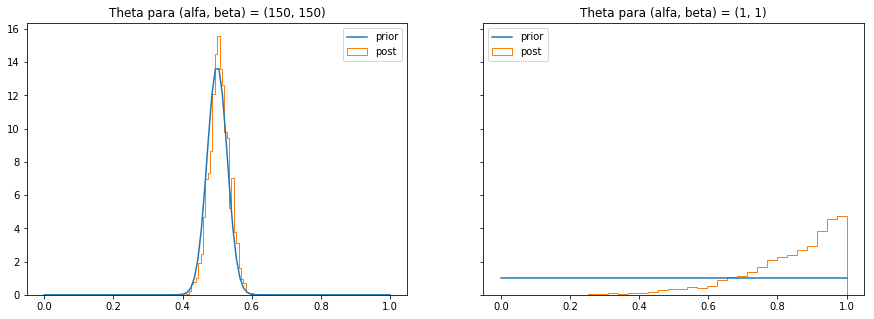

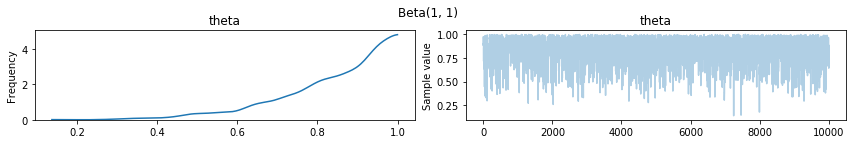

Máximo a posteriori para prior Beta(1, 1): 0.999998462083


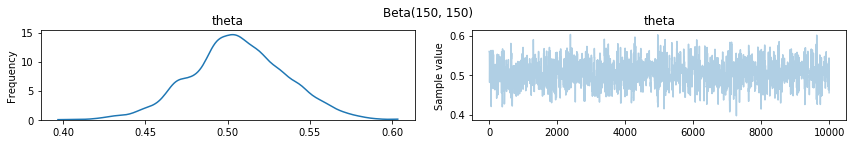

Máximo a posteriori para prior Beta(150, 150): 0.509068468161


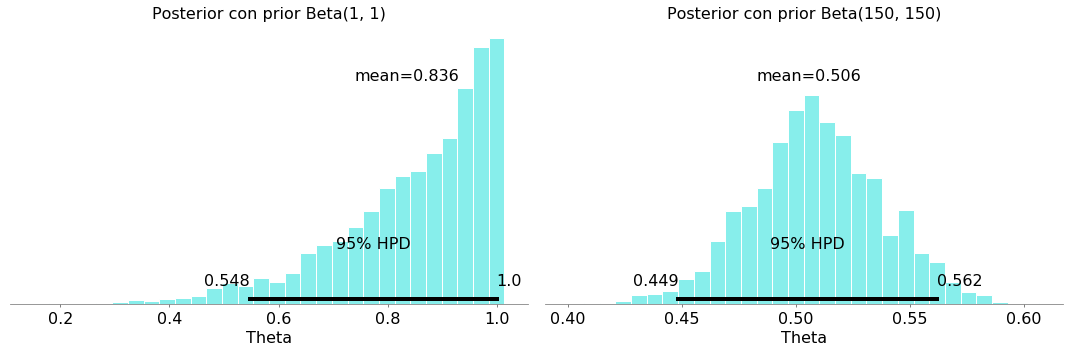

In [13]:
plt.clf()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
x = np.linspace(0, 1, 100)

axes[0].plot(x, stats.beta.pdf(x, 150, 150), label='prior')
axes[0].hist(trace150['theta'], 30, histtype='step', normed=True, label='post')
axes[0].legend(loc='best')
axes[0].set_title('Theta para (alfa, beta) = (150, 150)')

axes[1].plot(x, stats.beta.pdf(x, 1, 1), label='prior')
axes[1].hist(trace1['theta'], 30, histtype='step', normed=True, label='post')
axes[1].legend(loc='upper left')
axes[1].set_title('Theta para (alfa, beta) = (1, 1)')
fig.show()

map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)


map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)

pm.traceplot(trace1)
plt.suptitle("Beta(1, 1)")
plt.show()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])


pm.traceplot(trace150)
plt.suptitle("Beta(150, 150)")
plt.show()

print "Máximo a posteriori para prior Beta(150, 150): {}".format(map_150_150['theta'])
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

pm.plot_posterior(trace1, color='#87eeeb', point_estimate='mean', ax=axes[0])
axes[0].set_title("Posterior con prior Beta(1, 1)", fontsize=16)
axes[0].set_xlabel("Theta", fontsize=16)

pm.plot_posterior(trace150, color='#87eeeb', point_estimate='mean', ax=axes[1])
axes[1].set_title("Posterior con prior Beta(150, 150)", fontsize=16)
axes[1].set_xlabel("Theta", fontsize=16)

fig.show()

### Predicciones del modelo
---

In [14]:
ppc1 = pm.sample_ppc(trace1, samples=1, model=modelo1, size=10, progressbar=False)
ppc150 = pm.sample_ppc(trace150, samples=1, model=modelo150, size=10, progressbar=False)
print "Prediccion de 10 tiradas para (1,1): {}".format(ppc1['tirada'][0])
print "Prediccion de 10 tiradas para (150,150): {}".format(ppc150['tirada'][0])

Prediccion de 10 tiradas para (1,1): [1 1 1 0 1 1 1 1 1 1]
Prediccion de 10 tiradas para (150,150): [0 0 0 1 0 0 0 1 1 0]


---
El análisis acerca del prior sigue siendo similar al de los primeros puntos. A partir de los resultados podemos observar como el prior codifica de alguna manera el conocimiento previo que tenemos acerca de la situación sobre la que estamos realizando nuevas mediciones.

Comparemos por ejemplo para el modelo con prior Beta(1, 1) como se modifica las distribuciones de los valores luego de observar 3 caras de 3 tiradas y 20 caras de 20 tiradas.

Como mencionamos antes, este prior intenta codificar el "no conocimiento" acerca de la moneda, no tenemos ninguna creencia en particular acerca de si la moneda está cargada o no. Dado este modelo débil, resulta muy fácil que mediciones que sugieran una moneda cargada alteren mucho los valores del modelo, afectando más entre más sugestivas sean estas mediciones.

Es por esto que podemos observar que para el caso de 3 caras de 3 tiradas el valor medio de Theta se modifica de 0.5 a 0.836, y que en el caso de 20 caras de 20 tiradas cambia mucho más llegando a un valor medio de 0.956.

Por otro lado el segundo modelo tiene una creencia a priori bastante fuerte de que la moneda no se encuentra cargada, por lo que las nuevas observaciones dado su tamaño si bien modifican levemente la creencia sobre la probabilidad de la moneda, lo hacen mucho más levemente. Por ejemplor, en el caso en que se observan 20 caras de 20 tiradas, el Theta promedio cambia de valer 0.5 a 0.531, un cambio mucho menor que en el primer modelo.

Para los modelos en general podemos ver que es posible codificar la creencia en la correctitud del modelo inicial planteado a partir de los priors que utilicen. Un modelo del cual se cree que ya es bastante acertado utilizará priors que indiquen bastante "experiencia" previa, mientras que un modelo que es muy ajustable utilizará priors que intenten codificar desconocimiento acerca de las mediciones.

# 5. Prior
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.

---
Asumiendo que hablamos acerca de una moneda cualquiera, consideramos que ya observar 10 caras consecutivas harían que empecemos a sospechar acerca de la integridad de ella, por lo que en principio tendríamos un prior que indique que creemos inicialmente en que la moneda no se encuentra cargada, pero que esta creencia no es muy fuerte. Esto significaría por ejemplo que nuestro prior podría ser el de una distribución entre Beta(5, 5) y Beta(20, 20).

---

Text(0.5,1,u'Theta para nuestro prior Beta(5, 5)')

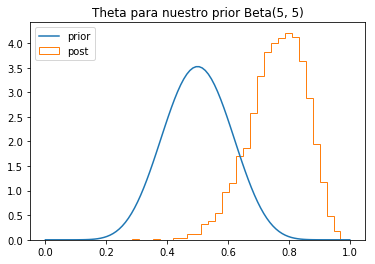

In [22]:
obs_b = [1]*10
with pm.Model() as nosotros:
    theta1 = pm.Beta('theta', alpha=5, beta=5)
    
    coin_obs1 = pm.Binomial('observadas', n=10, p=theta1, observed=10)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=nosotros, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)

plt.clf()

x = np.linspace(0, 1, 100)

plt.plot(x, stats.beta.pdf(x, 10, 10), label='prior')
plt.hist(trace1['theta'], 30, histtype='step', normed=True, label='post')
plt.legend(loc='best')
plt.title('Theta para nuestro prior Beta(5, 5)')

En el gráfico de arriba observamos entonces como se modifica considerablemente la distribución de los valores sobre theta luego de las 10 tiradas pasando de 0.5 a ~0.8, lo que indica el cambio en nuestra creencia de la naturaleza de la moneda luego de esas tiradas.